### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 24th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

#### Part 1

Let the set of input features for input one be $X_{1}$, comprised of datapoints $x_{11}, x_{12}, ... x_{1n}$, and the set of input features for input two to be $X_{2}$ comprised of datapoints $x_{21}, x_{22}, ... x_{2n}$. The model, as given, has two sinapses, with weights $w_{1}$ and $w_{2}$, and a single neuron with a bias $b$, an activation function $f(z) = z$ (where $z=\sum x_{i}w_{i}$ to not confuse with out inputs $x$), and an output $Y$ comprised of $y_{1}, y_{2}, ... y_{n}$. The equation that describes the output of this network is:

$$ f(z) = Y $$



$$ f(X_{1}w_{1} + X_{2}w_{2} + b) = Y$$

since the activation function is just $f(z) = z$, the output is:

$$ X_{1}w_{1} + X_{2}w_{2} + b = Y $$

As for whether this model will learn non-linearities: No.
The set of equations that governs the input, weights, and biases is a set of linear equations. Because the entire set of equations is a set of linear equations, the output must be restricted to a linear combination of the input data, the weights, and the bias. Since the first word in 'linear combination' is, well, linear, this model won't be able to describe non-linearities. And, indeed, when run-as is, that is what we see.

![](Linear_Classification.png)

SRT: Almost there on the network equation. You're missing the weight of the synapse that connects the single-neuron hidden layer to the output. -1

#### Part 2

With a different activation function, the model can learn non-linearities. Here is an example of the output of a non-linear model with a ReLU activation function and two neurons in the hidden layer.

![](ReLU_2neurons_1layer.png)

#### Part 3

For the first part of this, I kept the 'standard' conditions and only regenerated the data and reset the number of training epochs to zero for each trial. Running the model 5 times I get the 5 following "test loss/training loss" pairs:

0.192/0.185  
0.224/0.148  
0.220/0.141  
0.352/0.290  
0.161/0.146  

So there is indeed variation in model quality that is affected by the inherent randomness of the underlying data. 


#### Part 4

I had one run from part 3 that broke the ".177 test loss" barrier in my five runs with 1 layer with 3 neurons. 

It seems like that regardless of the activation function, learning rate, and regularization, one layer maxing out at 8 neurons just can't break around a 0.16 - 0.18 test loss on average. 

From here, I tried a "kitchen sink approach" where I looked at 6 hidden layers with 8 neurons each. Even at this threshold, it appeared as though I was hitting this ".177 test loss" about one in every two runs.



#### Part 5

In all three cases (I ran about 5 trials for each of the three), it seemed that the model fit, the convergence rate, and whether the model was good or not were not particularly effected by the changes in network architecture complexity. This surprised me a bit as my intuition was that a more complicated network would take longer to converge (perhaps I this wasn't a sizeable enough increase to notice the difference).

SRT: Excellent, and great commentary Bill.

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

#### Part 1

Using the constraints outlined, I could get the model down to a training loss of about 0.47 on average. Below is an example of one of the outputs. The model seems to be able to some form of non-linearity, just not nearly enough for a spiral like form.

![](smoothness.png)

SRT: Surprising, and I suspect that here you didn't run it for a sufficient number of epochs. You need at least a 1000. The test loss can look like it has plateaued and then take a sudden dip to lower values. -2

#### Part 2

With adding in the sines of the features (on a 3 hidden-layer network with 3 neurons each, I can get a test-loss in the high 0.3 - low 0.4 range, a noticable improvement, and a model that is more freely non-linear. Throwing in all of the feature-engineering, I can get something that shows a pretty noticeably small test-loss (below):

![](All_feature_engineering.png)

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

#### Part 1

In [1]:
# BS - import the basics and the data

import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_galaxy_colors

data = fetch_sdss_galaxy_colors()

# BS - Take every 10th row of the data
data_sub = data[1::10][:]


In [2]:
# BS - create the color arrays

u_g = data_sub['u'] - data_sub['g']
g_r = data_sub['g'] - data_sub['r']
r_i = data_sub['r'] - data_sub['i']
i_z = data_sub['i'] - data_sub['z']

# BS - create the spectral class array
spec_class = data_sub['specClass']

# BS - create redshift array (Note to self: be careful about confusing color 'z' and redshift 'z')
redshift = data_sub['redshift']


In [3]:
# BS - create mask to quantify galaxy and quasar labels
mask_gal = (spec_class == 'GALAXY')
mask_quas = (spec_class == 'QSO')

# BS - create array for quasars and galaxies (quasars = 1, galaxies = 0)
gal_quas_binary = np.zeros(len(spec_class))
gal_quas_binary[mask_quas] = 1

# BS - print number of quasars and galaxies (never hurts to check the slicing worked)
print("Number of galaxies: {} \nNumber of quasars: {}".format(np.sum(mask_gal), np.sum(mask_quas)))

Number of galaxies: 4290 
Number of quasars: 710


#### Part 2

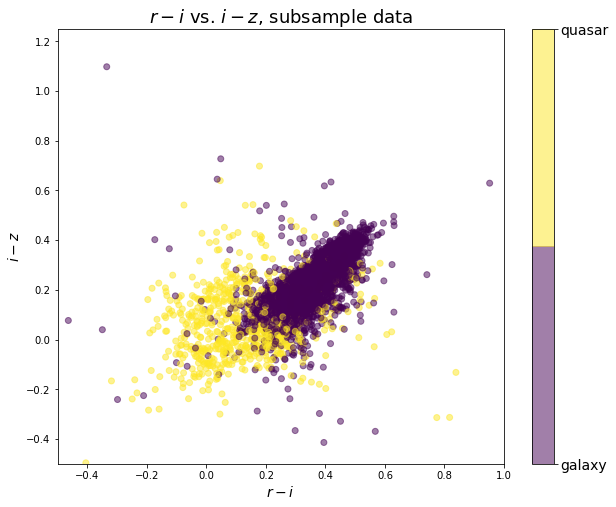

In [4]:
# BS - plot r-i vs. i-z

fig = plt.figure(figsize=(10,8))
ax = plt.subplot()
im = ax.scatter(r_i, i_z, c=gal_quas_binary, cmap=plt.cm.get_cmap('viridis', 2), alpha=0.5)
ax.set_xlim(-0.5, 1.0)
ax.set_ylim(-0.5, 1.25)
ax.set_xlabel(r"$r-i$", fontsize=14)
ax.set_ylabel(r"$i-z$", fontsize=14)
ax.set_title(r"$r-i$ vs. $i-z$, subsample data", fontsize=18)
cbar = fig.colorbar(im, ax=ax, ticks=[0, 1])
cbar.ax.set_yticklabels(['galaxy', 'quasar'], fontsize=14)
plt.show()

#### Part 3

In [5]:
# BS - stack the color data

X = np.stack((r_i, i_z), axis=1)

# BS - reassign the target data
y = gal_quas_binary


In [6]:
# BS - test-train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Part 4

In [7]:
# BS - create the array for the normed data

X_train_normed = np.zeros((len(X_train), 2), 
                      dtype=np.float32)

# BS - loop through the two features, and calculate the norm as 
# (data point in feature - mean of feature) / standard deviatin of feature

# BS - normed training data
for i in range(len(X_train_normed)):
    
    # BS - feature 1
    X_train_normed[i, 0] = ((X_train[i, 0] - X_train[:, 0].mean()) / 
                        X_train[:,0].std())
    
    # BS - feature 2
    X_train_normed[i, 1] = ((X_train[i, 1] - X_train[:, 1].mean()) / 
                        X_train[:,1].std())

# BS - normed testing data
X_test_normed = np.zeros((len(X_test), 2), 
                      dtype=np.float32)

for i in range(len(X_test_normed)):
    
    X_test_normed[i, 0] = ((X_test[i, 0] - X_test[:, 0].mean()) / 
                        X_test[:,0].std())
    
    X_test_normed[i, 1] = ((X_test[i, 1] - X_test[:, 1].mean()) / 
                        X_test[:,1].std())


SRT: Yes, but a little penalty from doing too much work here. We have already used the `preprocessing.scale` function from scikit-learn extensively. That will do the same thing in one line. -1

#### Part 5

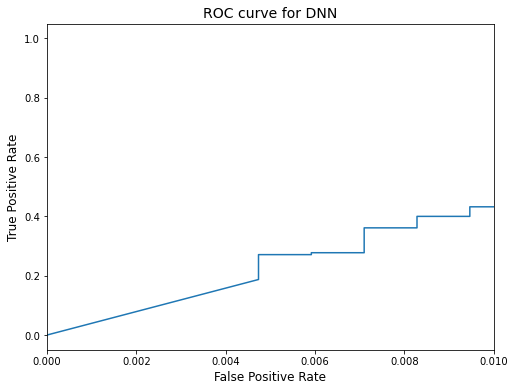

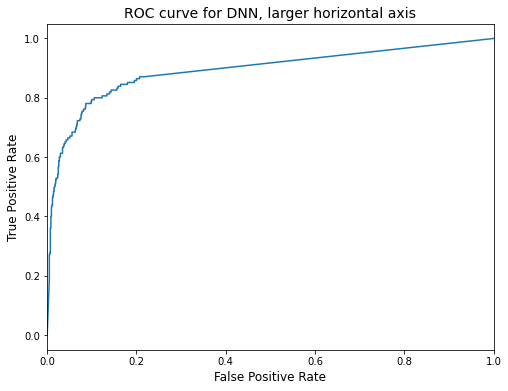

In [8]:
# BS - import the packages

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve


# BS - create the classifier object with speficied paramters
clf = MLPClassifier(random_state=42, max_iter=1000, 
                    activation='relu', solver='sgd', hidden_layer_sizes=(5,2))

# BS - fit the model
model = clf.fit(X_train_normed, y_train)

# BS - calculate the probability of the label on the targets (targets being quasars)
y_probs = clf.predict_proba(X_test_normed)[:, 1]

# BS - calculate the false positive and true positive rates
fpr, tpr, thresh = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6 ))
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC curve for DNN", fontsize=14)
plt.plot(fpr, tpr)
plt.xlim(0,0.01)
plt.show()

# BS - extended x-axis to see how the curve keeps going
plt.figure(figsize=(8,6 ))
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC curve for DNN, larger horizontal axis", fontsize=14)
plt.plot(fpr, tpr)
plt.xlim(0,1)
plt.show()

SRT: Very good.

#### Part 6

In [9]:
# BS - import gridsearchcv

from sklearn.model_selection import GridSearchCV

# BS - create the estimator object without specific parameters
mlp = MLPClassifier(random_state=42, max_iter=1000)

# BS - grid of parameters to search through
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

# BS - create the grid search object
grid = GridSearchCV(estimator=mlp, param_grid = parameters, n_jobs=-1)

# BS - fit the gridsearch object with the data
grid.fit(X_train_normed, y_train)

# BS - print the best score
print ("Best score is: ", grid.best_score_)

# BS - print the best parameters
print("Best parameters are: ", grid.best_params_)

# BS - assign the best parameters to variables
best_activation = grid.best_params_['activation']
best_solver = grid.best_params_['solver']
best_layersize = grid.best_params_['hidden_layer_sizes']

Best score is:  0.9375
Best parameters are:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}


#### Part 7

In [10]:
# BS - make the classifier object with the better parameters
clf_better = MLPClassifier(random_state=42, max_iter=1000, activation=best_activation, 
                           solver=best_solver, hidden_layer_sizes=best_layersize)

# BS - fit the model with the training data
model_better = clf_better.fit(X_train_normed, y_train)

# BS - find the target probabilities for the quasars
y_probs_better = clf_better.predict_proba(X_test_normed)[:, 1]

# BS - calculate the false positive and true positive rates
fpr_better, tpr_better, thresh = roc_curve(y_test, y_probs_better)


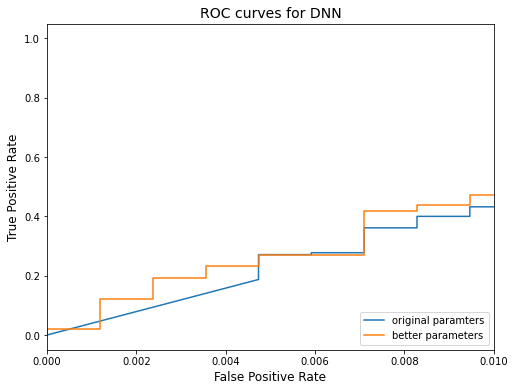

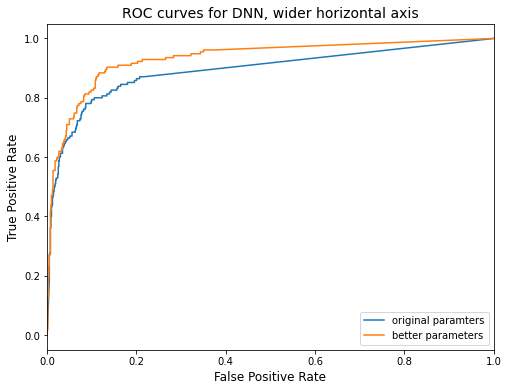

In [11]:
# BS - plot the false positive and true positive rates (narrow and wide x-axis)

# BS - narrow x-axis (same as previous homework)
plt.figure(figsize=(8,6 ))
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC curves for DNN", fontsize=14)
plt.plot(fpr, tpr, label="original paramters")
plt.plot(fpr_better, tpr_better, label="better parameters")
plt.xlim(0,0.01)
plt.legend(loc=4)
plt.show()

# BS - wide x-axis 
plt.figure(figsize=(8,6 ))
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC curves for DNN, wider horizontal axis", fontsize=14)
plt.plot(fpr, tpr, label="original paramters")
plt.plot(fpr_better, tpr_better, label="better parameters")
plt.xlim(0,1)
plt.legend(loc=4)
plt.show()

# BS - le voilà dans les données

SRT: Great job, Bill!